# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
# Reading Data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sys

df = pd.read_csv('C:\\Users\\sudhanshu\\Desktop\\Springboard\\Exploratory Data Analysis\\human_temp\\data\\human_body_temperature.csv')


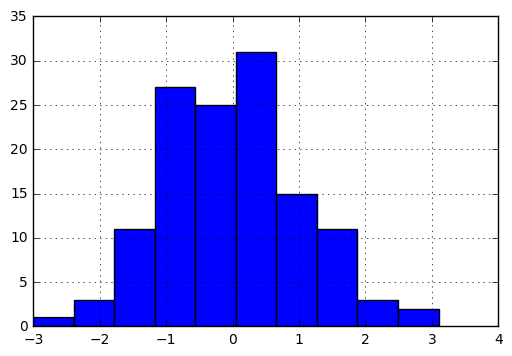

In [2]:
#Ques 1: Is the distribution of body temperatures normal?
#Answer: Checked population distribution by plotting Histogram

plt.figure()

df["temperature"].diff().hist(bins=10)

#Population appers to be normal (bell shaped)


In [3]:
#Ques 2: Is the sample size large? Are the observations independent?
#Answer:  Calculated the sample size. With sample size at 130 it is large enough.
# Difficult to answer the independence question as little information is available
# as to how it is collected.
sample_Count=df["temperature"].count()
sample_Count

#Sample seems large enough (>30)



130

In [4]:

#Ques 3:  Is the true population mean really 98.6 degrees F? Would you use a one-sample or two-sample test? Why?
#         In this situation, is it appropriate to use the tt or zz statistic?

#Answer: Sample mean is taken as the estimation of population mean and confidence interval
#at 95% are calculated around it using 2 tail Z test. Z test is chosen because sample size is large enough
#and condition of T test: unkown population SD AND sample size less than 30 are not met
#Now try using the other test. How is the result be different? Why? 

sample_mean=df["temperature"].mean()
sample_mean

#Point estimate of population mean is 98.24923076923078



98.24923076923078

In [5]:

# Sample Stand Deviation is:

sample_Std=df["temperature"].std()
sample_Std



0.7331831580389454

In [6]:
#At 95% confidence(Two tail critical value for Z test: 1.96) we can say that it may lie between:    
UpperLimit = sample_mean + 1.96*(sample_Std/np.sqrt(sample_Count)) 
LowerLimit = sample_mean - 1.96*(sample_Std/np.sqrt(sample_Count)) 
print("Lower Limit for Z test is ", LowerLimit)
print("Upper Limit for Z test is ", UpperLimit)


Lower Limit for Z test is  98.1231941122
Upper Limit for Z test is  98.3752674262


In [7]:

#Two tail test is chosen because the value of the mean can be lower or higer than the Point Estimate

#At 95% confidence(Two tail critical value for T test: 1.984) we can say that it may lie between:    
t_test_UpperLimit = sample_mean + 1.984*(sample_Std/np.sqrt(sample_Count)) 
t_test_LowerLimit = sample_mean - 1.984*(sample_Std/np.sqrt(sample_Count)) 
print("Lower Limit for T test is ", t_test_LowerLimit)
print("Upper Limit for T test is ", t_test_UpperLimit)

#95% confidence interval is wider in case of T test because it is a fatter distribustion than 
#pure normal distribution specified by Z test


Lower Limit for T test is  98.1216508062
Upper Limit for T test is  98.3768107322


In [8]:
#Ques 4: At what temperature should we consider someone's temperature to be "abnormal"?
#Answer: At temprature greater than 98.375 or less than 98.123 because that is the range 
#in which we can confidently say 95% normal body tempratue will be. Alternatively there is only 5% chance that 
#body temprature will be outside this range


In [9]:
#Ques 5: Is there a significant diffrence between male and females in normal temprature?
#        What test will you use and why?
#Answer:

#Subsetting data for male and female population

Male=df[(df["gender"]=="M")]
Female=df[(df["gender"]=="F")]
                
Male_mean=Male["temperature"].mean()
Female_mean=Female["temperature"].mean()

Diff=Male_mean-Female_mean


Male_Std=Male["temperature"].std()
Female_Std=Female["temperature"].std()

Male_Count=Male["temperature"].count()
Female_Count=Female["temperature"].count()

Zstat=Diff/(np.sqrt( (Male_Std**2)/Male_Count + (Female_Std**2)/Female_Count ))

print("Z Score", Zstat)

# As Z score (-2.285) is less than the critical value at -1.96 hence there is a 
# significant difference between Male and Female body temprature
# Females seem to be  hotter than Males by approx 0.3 degree but the Effect size is 
# pretty Small for all practical purposes 


Z Score -2.28543453817
